## Image Identification with Keras

## MNIST Fashion Dataset

* Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [4]:
data = fashion_mnist.load_data()

In [5]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [8]:
datas = np.array(data)

In [11]:
print(datas[0,0].shape)
print(datas[0,1].shape)
print(datas[1,0].shape)
print(datas[1,1].shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [12]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [13]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [26]:
print(train_labels.shape)
train_labels = np.array(train_labels)
print(np.unique(train_labels))

(60000,)
[0 1 2 3 4 5 6 7 8 9]


In [27]:
print(train_labels.shape)
train_labels = np.array(train_labels)
print(np.unique(train_labels))

(60000,)
[0 1 2 3 4 5 6 7 8 9]


## Plotting Images

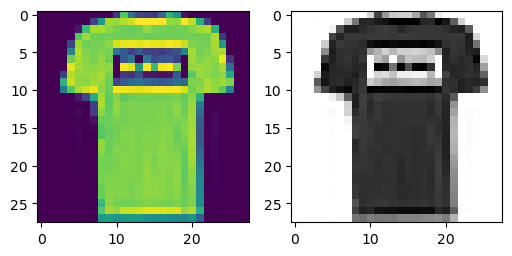

In [24]:
fig, ax = plt.subplots(1,2, figsize = (6,3))
ax[0].imshow(train_images[1])
ax[1].imshow(train_images[1], cmap = plt.cm.binary)

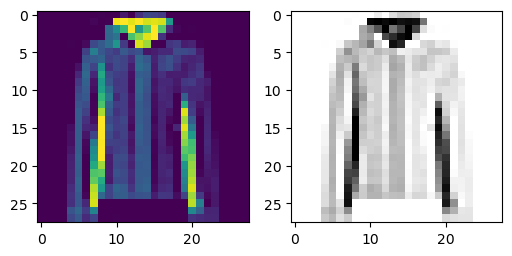

In [33]:
fig, ax = plt.subplots(1,2,figsize = (6,3))
ax[0].imshow(test_images[6])
ax[1].imshow(test_images[6], cmap = plt.cm.binary)

## Creating Network Architecture

In [36]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation = 'relu',input_shape = (28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))

In [44]:
network.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Image Data

In [39]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float64')

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float64')

## One Hot Encoding

In [40]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)

test_labels = to_categorical(test_labels)

## Training

In [45]:
network.fit(train_images, train_labels, epochs=5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 14s 25ms/step - loss: 17.5578 - accuracy: 0.7218
Epoch 2/5
469/469 [==============================] - 11s 22ms/step - loss: 0.6711 - accuracy: 0.8045
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.5758 - accuracy: 0.8291
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 0.5510 - accuracy: 0.8370
Epoch 5/5
469/469 [==============================] - 10s 22ms/step - loss: 0.5125 - accuracy: 0.8443


In [46]:
loss , acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.5688 - accuracy: 0.8314


In [52]:
pred = network.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [53]:
pred.shape

(10000, 10)